<a href="https://colab.research.google.com/github/kmongsil1105/colab_ipynb/blob/main/4th_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4차시: 텐서플로우 2.x 활용 Convolution Neural Network (CNN)

## AI 맛보기 3주차: 2020. 07. 21. 20:00 ~ 22:00 (120분)
1. 

#### 참고자료
- [파이썬 3 표준 문서](https://docs.python.org/3/index.html)
- [텐서플로우 CNN](https://www.tensorflow.org/tutorials/images/cnn)

- 수업내용 ppt : https://docs.google.com/presentation/d/1OvjvV_F-Pn5Pp75GFi-2Hoig2BisyWqwBg_9WNzPQCg/edit

# (활용) 멍멍이? 고양이?


# 1. 도구 불러오기 및 버전 확인

In [ ]:
# 도구 준비 :: import ⇒ 표준 라이브러리, 텐서플로우 등 불러오기
# 공식 Tensorflow 업데이트 됨!

import os
import shutil
import random
import math

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import numpy as np

print(f'Tensorflow 버전을 확인합니다: {tf.__version__}')


Tensorflow 버전을 확인합니다: 2.3.0


# 2. 학습 데이터 다운로드: CIFAR10 이미지 분류 데이터

# CIFAR10 데이터셋 :: 10진 분류 이미지 데이터셋

Canadian Institute For Advanced Research 에서 만든 이미지 분류 데이터 셋

# 데이터 다운로드

In [ ]:

# dataset_path = os.path.abspath(os.path.expanduser('~/.keras/datasets/')) # Linux
# if os.path.exists(dataset_path):
#     shutil.rmtree(dataset_path)

(_train_images, train_labels), (_test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


# CIFAR10 데이터 불러오기

* 머신러닝 / 딥러닝에서는 학습 데이터와 테스트 데이터를 분리 
: TrainSet / TestSet

* Keras Datasets는 학습 셋 / 테스트 셋을 미리 구분해두었음 : 데이터셋 불러오기 반환이 2개!



In [ ]:
print(f'학습에 사용할 이미지는 {len(_train_images)}개 입니다.')
print(f'학습한 후 테스트(검증)에 사용할 이미지는 {len(_test_images)}개 입니다.')

학습에 사용할 이미지는 50000개 입니다.
학습한 후 테스트(검증)에 사용할 이미지는 10000개 입니다.


# CIFAR-10 데이터 레이블

* 10가지 옷 종류 이미지 :: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
* 32 x 32 픽셀 컬러 이미지: 총 6만장

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(f'데이터의 레이블은 {len(class_names)}개 이며, 데이터셋에 포함되어 있지 않으므로 설명서에서 확인해야 합니다.')
print('레이블 번호와 레이블: ')
for i in range(0, len(class_names)):
    print(f'{i}: {class_names[i]}')

데이터의 레이블은 10개 이며, 데이터셋에 포함되어 있지 않으므로 설명서에서 확인해야 합니다.
레이블 번호와 레이블: 
0: Airplane
1: Automobile
2: Bird
3: Cat
4: Deer
5: Dog
6: Frog
7: Horse
8: Ship
9: Truck


# 3. 학습 데이터 살펴보기: 차원, 미리보기

# 컬러 이미지 차원

* N차원 데이터 표현 (매트릭스) :: 참고자료: https://numpy.org/devdocs/user/quickstart.html
* 이미지는 보통 3차원 (컬러)

In [ ]:
print(f'학습 이미지 형태: {_train_images.shape}')
print(f'학습 레이블 형태: {train_labels.shape}')

학습 이미지 형태: (50000, 32, 32, 3)
학습 레이블 형태: (50000, 1)


In [ ]:
print(f'테스트 이미지 형태: {_test_images.shape}')
print(f'테스트 레이블 형태: {test_labels.shape}')

테스트 이미지 형태: (10000, 32, 32, 3)
테스트 레이블 형태: (10000, 1)


# 컬러 이미지 데이터 살펴보기
* 0~255 사이의 값으로 이루어짐
* 1개의 숫자는 점 1개의 R | G | B 값 중 하나

In [ ]:
print('데이터 상태')
print(_train_images[0])

데이터 상태
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


# 학습용 예제 이미지 확인!
* 32 x 32 이미지가 6만장!

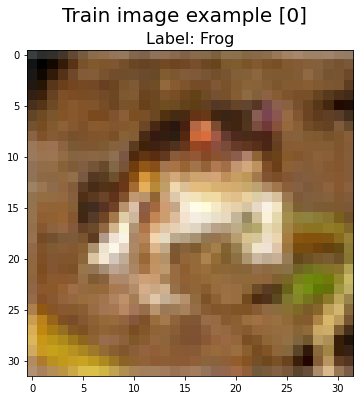

In [ ]:
idx = 0
fig1 = plt.figure(figsize=(6, 6))
ax = fig1.add_subplot()
axm = ax.imshow(_train_images[idx])
fig1.suptitle(f'Train image example [{idx}]', fontsize=20)
ax.set_title(f'Label: {class_names[train_labels[idx][0]]}', fontsize=16)
ax.grid(False)


# 4. 학습 데이터 전처리 (정규화)


# 학습 데이터 정규화
### * 정규화를 하면 범위가 0.0 ~ 1.0 사이로 변할 뿐 이미지는 똑같음
### * 이 데이터를 학습에 사용함!

In [ ]:
print('인공 신경망은 주로 -1.0 ~ 1.0 사이의 값을 받습니다.')
print('따라서 이미지를 255로 나누어줍니다.')
print('-----------------------------------')
train_images = _train_images / 255.0
test_images = _test_images / 255.0
print(f'기존 최소: {np.min(_train_images[0])}, 기존 최대: {np.max(_train_images[0])}')
print(f'정규화 후 최소: {np.min(train_images[0])}, 정규화 후 최대: {np.max(train_images[0])}')


인공 신경망은 주로 -1.0 ~ 1.0 사이의 값을 받습니다.
따라서 이미지를 255로 나누어줍니다.
-----------------------------------
기존 최소: 0, 기존 최대: 255
정규화 후 최소: 0.0, 정규화 후 최대: 1.0


# 정규화된 데이터 살펴보기
* 이제 0.0 ~ 1.0 사이의 값으로 이루어짐
* 1개의 숫자는 점 1개의 R | G | B 값 중 하나

In [ ]:
print('데이터 상태')
print(train_images[0])

데이터 상태
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.164

# 데이터 셋 확인!
* 32 x 32 이미지라서 잘 보이지는 않지만…

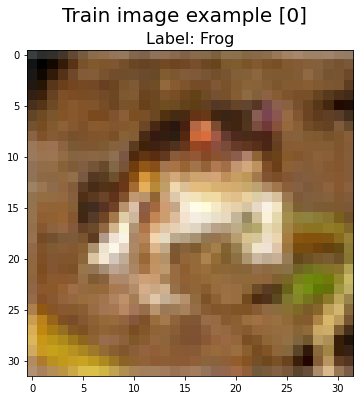

In [ ]:
# 정규화 전 데이터 셋 확인 코드 
#idx = 0
#fig1 = plt.figure(figsize=(6, 6))
#ax = fig1.add_subplot()
#axm = ax.imshow(_train_images[idx])
#fig1.suptitle(f'Train image example [{idx}]', fontsize=20)
#ax.set_title(f'Label: {class_names[train_labels[idx][0]]}', fontsize=16)
#ax.grid(False)
###############################################################

# 정규화 후에도 데이터 셋 확인 코드는 동일함을 알 수 있다!!
idx = 0
fig2 = plt.figure(figsize=(6, 6))
ax = fig2.add_subplot()
axm = ax.imshow(train_images[idx])
fig2.suptitle(f'Train image example [{idx}]', fontsize=20)
ax.set_title(f'Label: {class_names[train_labels[idx][0]]}', fontsize=16)
ax.grid(False)


# 데이터 셋 나열!
* 10가지 물건, 동물을 분류함!

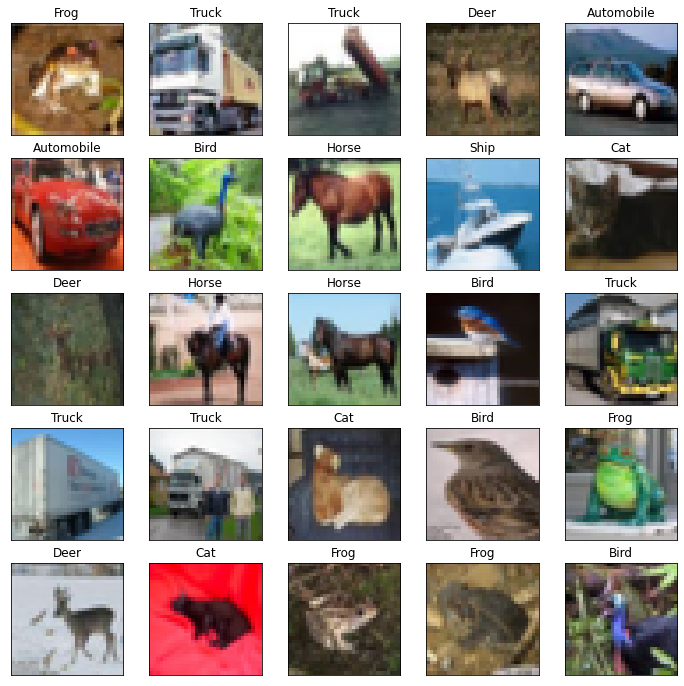

In [ ]:
fig3 = plt.figure(figsize=(12, 12))
fig3.set_facecolor('white')
for i in range(25):
    ax = fig3.add_subplot(5, 5, i+1)
    ax.imshow(train_images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[train_labels[i][0]])



# 데이터 셋 레이블 확인!
* 우리가 분류할 10가지 이미지를 
인덱스(숫자)와 레이블로 확인
* 데이터를 자세히 들여다보는 것은 매우 좋은 행동

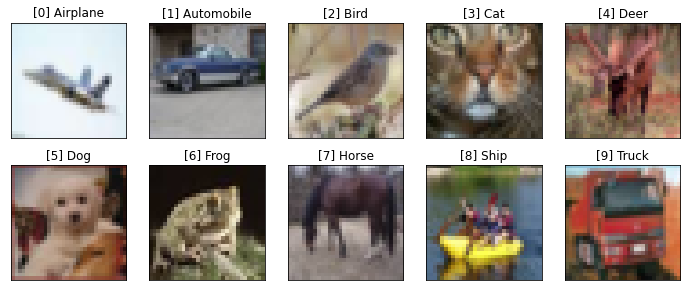

In [ ]:
fig4 = plt.figure(figsize=(12, 12/5*2))
fig4.set_facecolor('white')
for i in range(10):
    ax = fig4.add_subplot(2, 5, i+1)
    for j in range(10000, len(train_images)):
        if train_labels[j] == i:
            break
    ax.imshow(train_images[j])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'[{train_labels[j][0]}] {class_names[train_labels[j][0]]}', fontsize=12)



# 5. 학습 모델 준비: Deep CNN

# 학습 모델 생성!
## * 지금은 Convolution Neural Network 레이어를 이해하지 않고 따라하기!
## * Conv / Pooling 레이어 나중에 이해!

In [ ]:
print('모델 생성')
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(train_images.shape[1:])),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.summary()



모델 생성
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)           

# 학습 모델 컴파일
*  학습할 때 출력할 지표는 ‘정확도’


In [ ]:
print('모델 컴파일')
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



모델 컴파일


# 6. 학습
* 평소보다 느림!   ⇒   학습해야할 변수 (Param #) 가 많고 깊음

     Total params: 122,570   /  Trainable params: 122,570

     Non-trainable params: 0    /   Layer level: 8

* 에포크: 모든 데이터 셋을 한번씩 학습하는 단위
* 배치 크기: 스탭 당 학습하는 이미지 개수
* GPU 로 학습하면 매우 빠름!


In [ ]:
epochs = 30
history = model.fit(train_images, train_labels, 
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4961 - accuracy: 0.4519 - val_loss: 1.3858 - val_accuracy: 0.5060
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1357 - accuracy: 0.5992 - val_loss: 1.0847 - val_accuracy: 0.6128
Epoch 3/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9890 - accuracy: 0.6510 - val_loss: 0.9530 - val_accuracy: 0.6678
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8913 - accuracy: 0.6860 - val_loss: 0.9224 - val_accuracy: 0.6805
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8171 - accuracy: 0.7153 - val_loss: 0.9182 - val_accuracy: 0.6810
Epoch 6/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7594 - accuracy: 0.7342 - val_loss: 0.8552 - val_accuracy: 0.7016
Epoch 7/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7091 - accuracy: 0.7507 - val_loss: 0.8969 - val_accu

# 7. 학습 결과 테스트

# 학습 손실 / 검증 손실  ,  학습 정확도 / 검증 정확도  비교!!
* 보통 검증 셋의 정확도가 
학습할 때의 정확도보다 낮음 ==> 오버 피팅

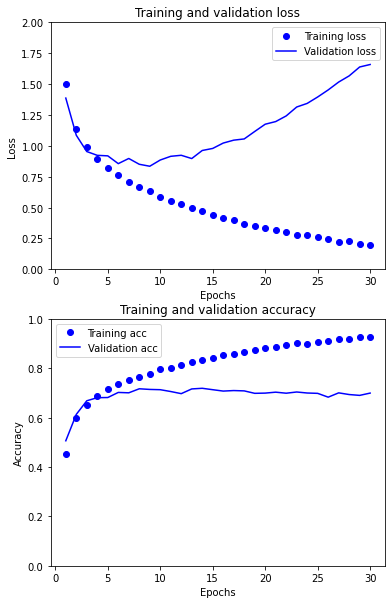

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

fig1 = plt.figure(figsize=(6, 10))
ax = fig1.add_subplot(2, 1, 1)
ax.plot(epochs, loss, 'bo', label='Training loss')
ax.plot(epochs, val_loss, 'b', label='Validation loss')
ax.set_ylim((0, math.ceil(max(max(loss), max(val_loss)))))
ax.set_title('Training and validation loss', fontsize=12)
ax.set_xlabel('Epochs', fontsize=10)
ax.set_ylabel('Loss', fontsize=10)
ax.legend()

ax = fig1.add_subplot(2, 1, 2)
ax.plot(epochs, acc, 'bo', label='Training acc')
ax.plot(epochs, val_acc, 'b', label='Validation acc')
ax.set_ylim((0, math.ceil(max(max(acc), max(val_acc)))))
ax.set_title('Training and validation accuracy', fontsize=12)
ax.set_xlabel('Epochs', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.legend()



In [ ]:
print(f'{len(test_images)}개 이미지로 테스트합니다.')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print()
print(f'테스트 이미지 정확도: {test_acc}')

10000개 이미지로 테스트합니다.
313/313 - 1s - loss: 3.7761 - accuracy: 0.6823

테스트 이미지 정확도: 0.6822999715805054


# (학습할 때 이미 했지만…) 모델 테스트
* 검증 데이터 셋으로 테스트 셋을 주었기 때문에 이미 결과가 있음


In [ ]:
print(f'{len(test_images)}개 이미지로 테스트합니다.')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print()
print(f'테스트 이미지 정확도: {test_acc}')


10000개 이미지로 테스트합니다.
313/313 - 1s - loss: 1.6576 - accuracy: 0.6990

테스트 이미지 정확도: 0.6990000009536743


# 테스트 이미지로 확인!
* 제대로 예측한 것인지 우리 눈으로 확인!


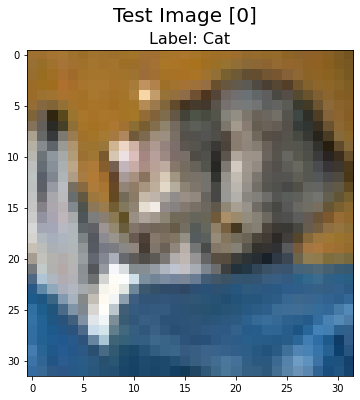

In [ ]:
idx = 0   # 10,000개의 이미지이므로 0 ~ 9999까지의 값 지정 가능

fig5 = plt.figure(figsize=(6, 6))
ax = fig5.add_subplot()
axm = ax.imshow(test_images[idx])
fig5.suptitle(f'Test Image [{idx}]', fontsize=20)
ax.set_title(f'Label: {class_names[test_labels[idx][0]]}', fontsize=16)
ax.grid(False)



# 8. 확률 모델

# 이 사진이 A일 확률은?
* 컴퓨터는 보통 값이 아닌 확률로 분류
* 확률 모델 생성
* Softmax 함수가 값을 확률로 만들어 줌   
##     ⇒   10개 확률의 합 == 1


In [ ]:
print('확률 모델')
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
probability_model.summary()



확률 모델
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                122570    
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 122,570
Trainable params: 122,570
Non-trainable params: 0
_________________________________________________________________


# 테스트 이미지의 예측 확률
* 예측 ⇒ 가장 높은 레이블로 예측하는 것
* np.argmax(): 최대 확률 인덱스를 선택하는 함수

In [ ]:
print('각 테스트이미지별 레이블 확률 계산')
predictions = probability_model.predict(test_images)


각 테스트이미지별 레이블 확률 계산


In [ ]:
idx = 0
print(f'예측 레이블은 확률 중 최대 확률을 선택합니다.')
print(f'Test image {idx} prediction: \n{predictions[idx]}')
print(f'Maximum probability label: {np.argmax(predictions[idx])}')
print(f'Actual label: {test_labels[idx][0]}')

# 아래 결과값들 에서 3번째 값이 가장 크므로... Actual label :: 3


예측 레이블은 확률 중 최대 확률을 선택합니다.
Test image 0 prediction: 
[2.2473356e-03 5.1016027e-06 7.5879055e-03 3.4214461e-01 4.6498557e-05
 4.9016067e-01 1.4297802e-03 1.6215147e-02 1.4016294e-01 6.5144228e-08]
Maximum probability label: 5
Actual label: 3


# 9. 예측

# 예측 확률 함수!
###   ===>  예측 확률을 구하는 함수

In [ ]:
# 이미지 함수 정의

def draw_image(ax, prob, image, true_label):
    ax.grid(False)
    axm = ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    predicted_label = np.argmax(prob)
    if true_label == predicted_label:
        color = 'blue'
    else:
        color = 'red'
    predicted_name = class_names[predicted_label]
    true_name = class_names[true_label]
    label = f'{predicted_name} {np.max(prob)*100:3.0f}% ({true_name})'
    ax.set_title(f'{label}', color=color)
    
def draw_bar(ax, prob, true_label):
    ax.grid(False)
    ax.set_xticks(range(10))
    ax.set_yticks(np.arange(0, 1.2, 0.2))
    bar = ax.bar(range(10), prob, color='gray')
    ax.set_ylim((0, 1))
    predicted_label = np.argmax(prob)
    bar[predicted_label].set_color('red')
    bar[true_label].set_color('blue')



# 예측 결과?
* 예측은 A일 확률이 N%다! 라고 하는 것
* 보통 가장 확률이 높은 것을 선택하게 됨

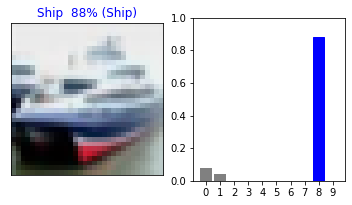

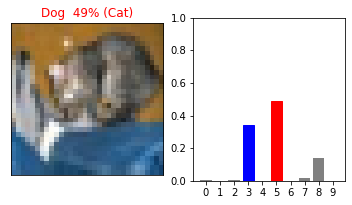

In [ ]:
for i in range(len(test_images)):
    if test_labels[i][0] == np.argmax(predictions[i]):
        break
fig6 = plt.figure(figsize=(6, 3))
ax = fig6.add_subplot(1, 2, 1)
draw_image(ax, predictions[i], test_images[i], test_labels[i][0])
ax = fig6.add_subplot(1, 2, 2)
draw_bar(ax, predictions[i], test_labels[i][0])

for i in range(len(test_images)):
    if test_labels[i] != np.argmax(predictions[i]):
        break
fig7 = plt.figure(figsize=(6, 3))
ax = fig7.add_subplot(1, 2, 1)
draw_image(ax, predictions[i], test_images[i], test_labels[i][0])
ax = fig7.add_subplot(1, 2, 2)
draw_bar(ax, predictions[i], test_labels[i][0])

# 예측 확률과 예측 결과
* 아직은 사람 눈으로 구분되는 것을
컴퓨터는 헷갈려함!

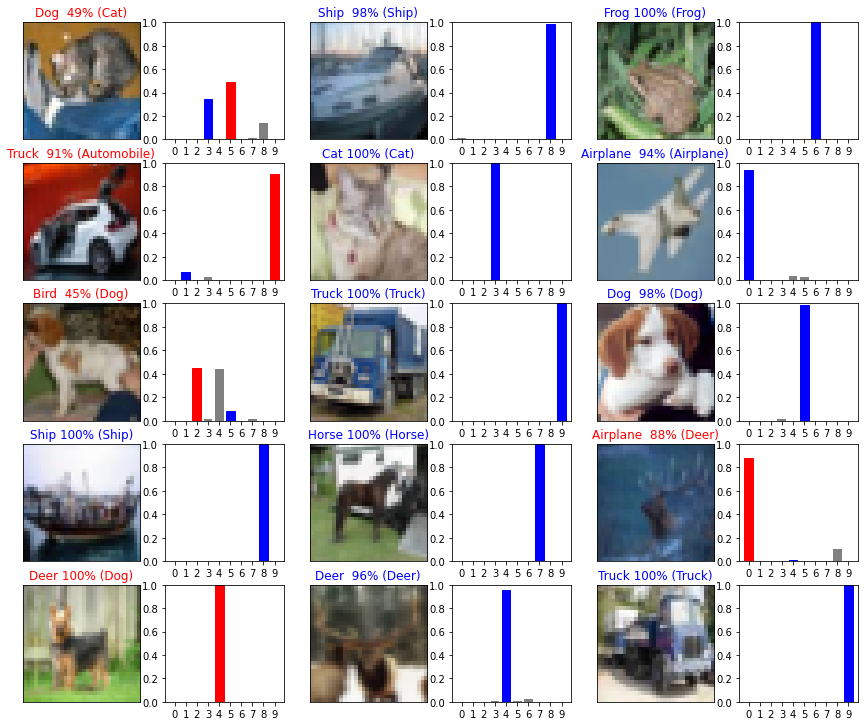

In [ ]:
base = 0
rows = 1 * 5
cols = 2 * 3
fig8 = plt.figure(figsize=(2.5*cols, 2.5*rows))
fig8.set_facecolor('white')
for i in range(0, rows*cols, 2):
    ax = fig8.add_subplot(rows, cols, i+1)
    draw_image(ax, predictions[base+i], test_images[base+i], test_labels[base+i][0])
    ax = fig8.add_subplot(rows, cols, i+2)
    draw_bar(ax, predictions[base+i], test_labels[base+i][0])


# 10. (드디어 배우는) Convolution Neural Network (CNN)

#우리가 지금까지 한 것?
* (쉽게 이야기해서) 
계수를 구해서 방정식을 찾는 것 :: f(x) = Ax + B


# Deep Learning? Hidden Layer가 있는가?
* 입력 값이 그대로 분류의 기준이 되는게 아님!
* ‘학습’되는 중간 레이어(Hidden layer)가 있는가?

# Convolution Neural Network
### * 특징 추출을 Convolution layer로 하는 Deep Learning

# CNN 시각화!
### * Convolution Layer
### * Pooling Layer

In [ ]:
outputs = [layer.output for layer in model.layers[:-3]]
intermediate_model = tf.keras.models.Model(inputs=model.input,
                                           outputs=outputs)
intermediate_model.summary()



Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
__________________________________________________

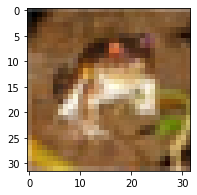

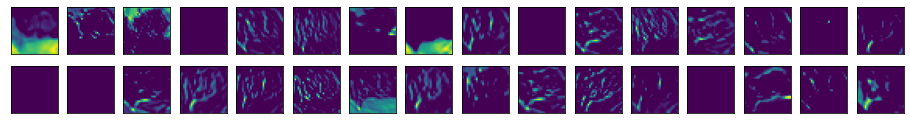

In [ ]:
image_idx = 0
model_idx = 0
intermediate_output = intermediate_model.predict(tf.expand_dims(test_images[image_idx], 0))
data = intermediate_output[model_idx]

fig9 = plt.figure(figsize=(3, 3))
fig9.set_facecolor('white')
ax = fig9.add_subplot()
ax.imshow(train_images[image_idx])
ax.grid(False)

fig10 = plt.figure(figsize=(16, math.ceil(data.shape[-1]/16)))
fig10.set_facecolor('white')
for i in range(0, data.shape[-1]):
    ax = fig10.add_subplot(math.ceil(data.shape[-1]/16), 16, i+1)
    ax.imshow(data[0, :, :, i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
############################
#image_idx = 0
#intermediate_output = intermediate_model.predict(tf.expand_dims(test_images[image_idx], 0))

#fig9 = plt.figure(figsize=(3, 3))
#fig9.set_facecolor('white')
#ax = fig9.add_subplot()
#ax.imshow(train_images[image_idx])
#ax.grid(False)

#for layer_idx in range(0, len(intermediate_output)):
#    data = intermediate_output[layer_idx]
#    fig = plt.figure(figsize=(16, math.ceil(data.shape[-1]/16)))
#    fig.set_facecolor('white')
#    for i in range(0, data.shape[-1]):
#        ax = fig.add_subplot(math.ceil(data.shape[-1]/16), 16, i+1)
#        ax.imshow(data[0, :, :, i])
#        ax.set_xticks([])
#        ax.set_yticks([])
#        ax.grid(False)

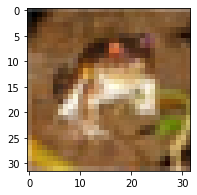

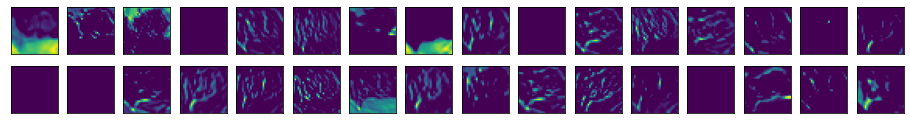

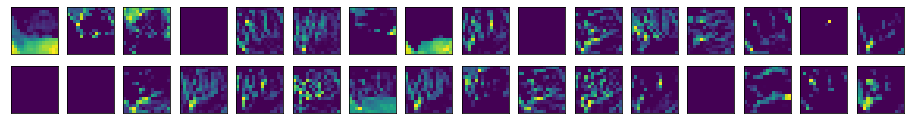

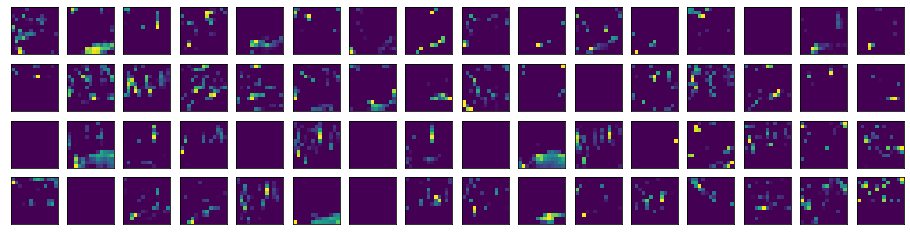

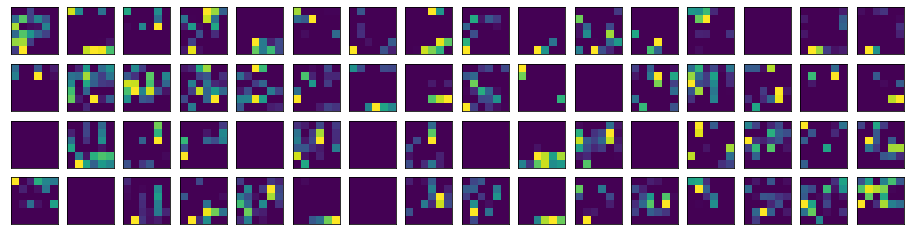

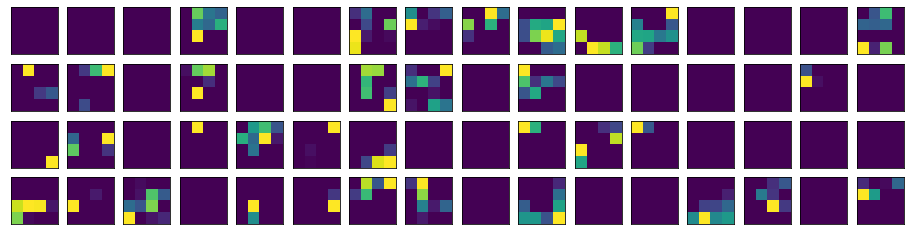

In [ ]:
image_idx = 0
intermediate_output = intermediate_model.predict(tf.expand_dims(test_images[image_idx], 0))

fig9 = plt.figure(figsize=(3, 3))
fig9.set_facecolor('white')
ax = fig9.add_subplot()
ax.imshow(train_images[image_idx])
ax.grid(False)

for layer_idx in range(0, len(intermediate_output)):
    data = intermediate_output[layer_idx]
    fig = plt.figure(figsize=(16, math.ceil(data.shape[-1]/16)))
    fig.set_facecolor('white')
    for i in range(0, data.shape[-1]):
        ax = fig.add_subplot(math.ceil(data.shape[-1]/16), 16, i+1)
        ax.imshow(data[0, :, :, i])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)